In [13]:
!wget 'https://raw.githubusercontent.com/karencfisher/dcgan/main/dcgan.py'

--2022-11-14 04:14:54--  https://raw.githubusercontent.com/karencfisher/dcgan/main/dcgan.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.110.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 7223 (7.1K) [text/plain]
Saving to: ‘dcgan.py’

dcgan.py            100%[===================>]   7.05K  --.-KB/s    in 0s      

2022-11-14 04:14:55 (61.8 MB/s) - ‘dcgan.py’ saved [7223/7223]



In [3]:
# Needs matplotlib version 3.3.4
!pip install matplotlib==3.3.4

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time

from tensorflow.keras.datasets import cifar10
import tensorflow as tf

from dcgan import DCGAN, Preprocessor

Load the fashion-mnist data set and preprocess images (scale and flatten)

In [2]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

In [3]:
model_path = None
dcgan = DCGAN(X_train.shape[1:], model_path=model_path)

In [4]:
# load cifar10

dcgan.preprocessor.fit(X_train)
X_train = dcgan.preprocessor.transform(X_train)


Look at a sample of the original images

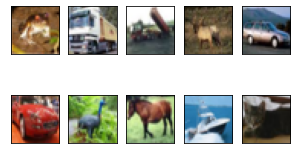

In [5]:
fig, ax = plt.subplots(2, 5, figsize=(5, 3))
fig.patch.set_facecolor('white')
for indx, img in enumerate(X_train[:10]):
    i, j = indx // 5, indx % 5
    img = dcgan.preprocessor.inverse(img)
    img = img.astype(int)
    ax[i, j].imshow(img, cmap=plt.cm.binary)
    ax[i, j].set_xticks([])
    ax[i, j].set_yticks([])

Instantiate and train our DCGAN

Epoch 1: 100%|##########| 500/500 [04:44<00:00,  1.76it/s]


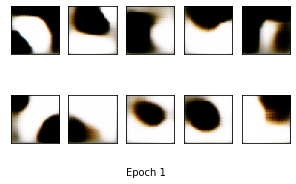

Epoch 5: 100%|##########| 500/500 [04:48<00:00,  1.73it/s]


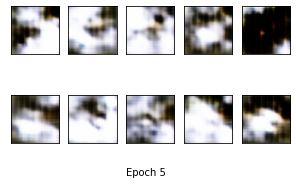

Epoch 10: 100%|##########| 500/500 [04:46<00:00,  1.74it/s]


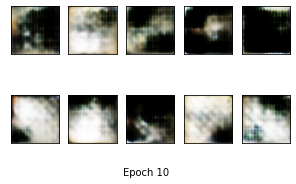

Epoch 15: 100%|##########| 500/500 [04:47<00:00,  1.74it/s]


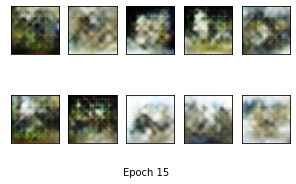

Epoch 20: 100%|##########| 500/500 [04:44<00:00,  1.76it/s]


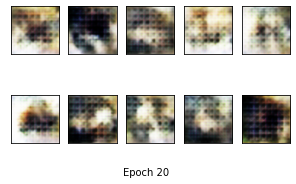

Epoch 25: 100%|##########| 500/500 [04:45<00:00,  1.75it/s]


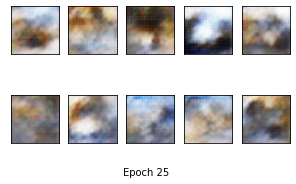

Epoch 30: 100%|##########| 500/500 [04:47<00:00,  1.74it/s]


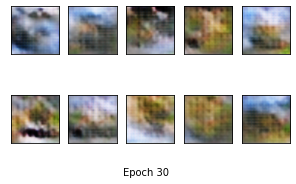

Epoch 35: 100%|##########| 500/500 [04:48<00:00,  1.73it/s]


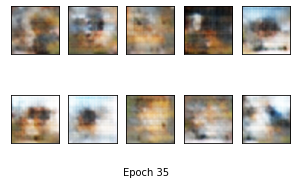

Epoch 40: 100%|##########| 500/500 [04:48<00:00,  1.73it/s]


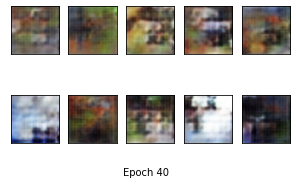

Epoch 45: 100%|##########| 500/500 [04:47<00:00,  1.74it/s]


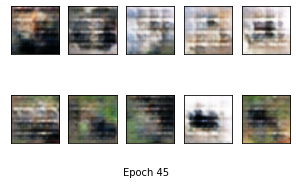

Epoch 50: 100%|##########| 500/500 [04:49<00:00,  1.73it/s]


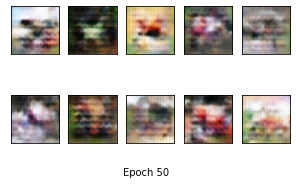

Epoch 55: 100%|##########| 500/500 [04:47<00:00,  1.74it/s]


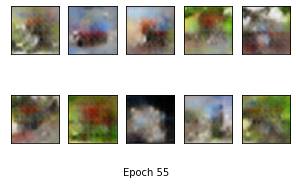

Epoch 60: 100%|##########| 500/500 [04:46<00:00,  1.74it/s]


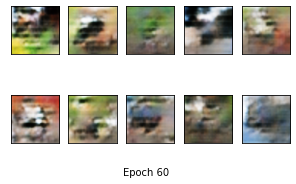

Epoch 65: 100%|##########| 500/500 [04:45<00:00,  1.75it/s]


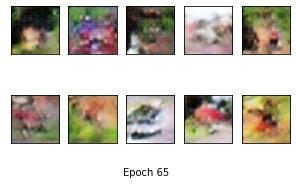

Epoch 70: 100%|##########| 500/500 [04:46<00:00,  1.74it/s]


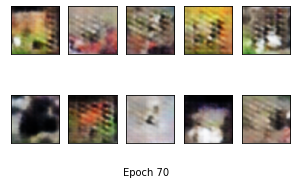

Epoch 75: 100%|##########| 500/500 [04:44<00:00,  1.76it/s]


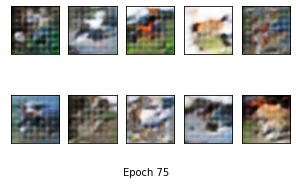

Epoch 80: 100%|##########| 500/500 [04:44<00:00,  1.76it/s]


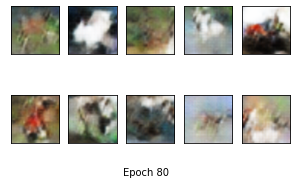

Epoch 85: 100%|##########| 500/500 [04:45<00:00,  1.75it/s]


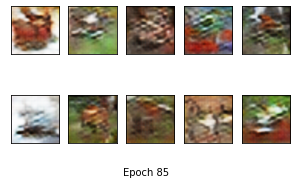

Epoch 90: 100%|##########| 500/500 [04:47<00:00,  1.74it/s]


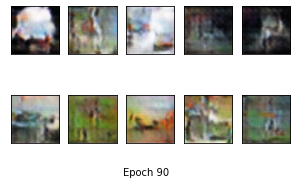

Epoch 95: 100%|##########| 500/500 [04:49<00:00,  1.73it/s]


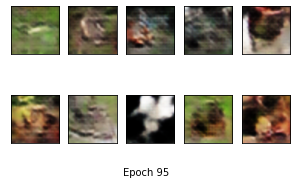

Epoch 100: 100%|##########| 500/500 [04:48<00:00,  1.74it/s]


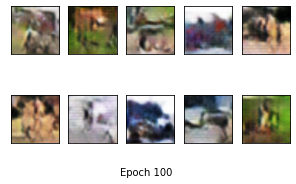

Total training time: 7:58:24


ValueError: ignored

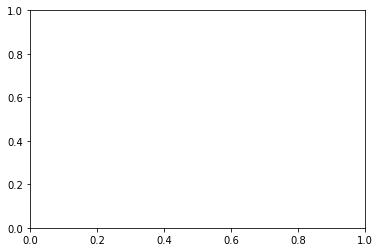

In [6]:
d_losses, g_losses = dcgan.train(X_train, 100, 100, verbose=5)

plt.plot(range(1, 26), d_losses, label='disc. loss')
plt.plot(range(1, 26), g_losses, label='gen. loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

print('Saving models\n')
dcgan.save_model('./content/drive/mydrive/cifar10_models')

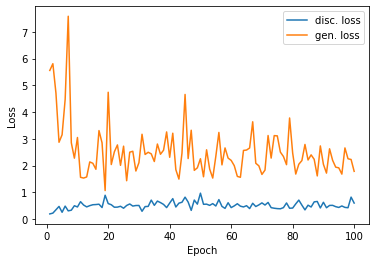

Saving models



FileNotFoundError: ignored

In [14]:
plt.plot(range(1, 101), d_losses, label='disc. loss')
plt.plot(range(1, 101), g_losses, label='gen. loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

print('Saving models\n')
dcgan.save_model('content/drive/MyDrive/cifar10_models')

In [12]:
!ls /content/drive/MyDrive/cifar10_models

In [17]:
dcgan.dcgan.save('dcgan.h5')

In [20]:
!zip -r /content/drive/MyDrive/cifar_10_models.zip /content/drive/MyDrive/cifar10_models 

  adding: content/drive/MyDrive/cifar10_models/ (stored 0%)
  adding: content/drive/MyDrive/cifar10_models/dcgan.h5 (deflated 8%)
  adding: content/drive/MyDrive/cifar10_models/discriminator.h5 (deflated 9%)
  adding: content/drive/MyDrive/cifar10_models/generator.h5 (deflated 9%)
